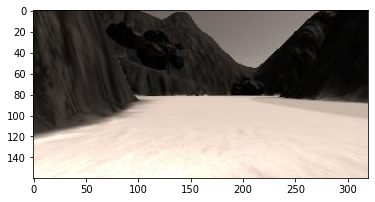

In [4]:

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Uncomment the next line for use in a Jupyter notebook
%matplotlib inline
# Define the filename, read and plot the image
filename = 'sample.jpg'

image = mpimg.imread(filename)

plt.imshow(image)
plt.show()


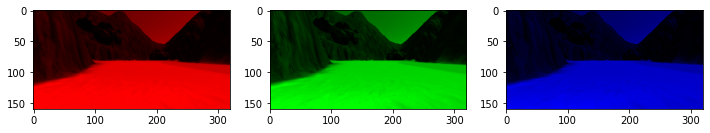

In [5]:
import numpy as np 

redChannel = np.copy(image)
redChannel[:, :, [1, 2]] = 0
greenChannel = np.copy(image)
greenChannel[:, :, [0, 2]] = 0
blueChannel = np.copy(image)
blueChannel[:, :, [0, 1]] = 0

fig = plt.figure(figsize=(12,3)) # Create a figure for plotting
plt.subplot(131)
plt.imshow(redChannel)
plt.subplot(132)
plt.imshow(greenChannel)
plt.subplot(133)
plt.imshow(blueChannel)


In [6]:
def colorThreshold(img, red_th, gre_th, blu_th):
    
    red = img[:,:,[0]]
    gre = img[:,:,[1]]
    blu = img[:,:,[2]]
    
    red_low_values_flags = red < red_th
    red_high_values_flags = red >= red_th

    gre_low_values_flags = gre < gre_th
    gre_high_values_flags = gre >= gre_th

    blu_low_values_flags = blu < blu_th
    blu_high_values_flags = blu >= blu_th


    red[red_low_values_flags] = 0
    red[red_high_values_flags] = 255

    gre[gre_low_values_flags] = 0
    gre[gre_high_values_flags] = 255

    blu[blu_low_values_flags] = 0
    blu[blu_high_values_flags] = 255
    

    image_th = np.concatenate((red, gre, blu), axis = 2)

    plt.imshow(image_th)
    plt.show()
    
    return image_th
    
def color_thresh(img, rgb_thresh=(0, 0, 0)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all three threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select


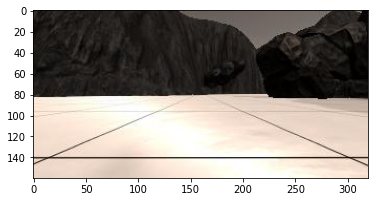

In [7]:
 
imageGrid = mpimg.imread('example_grid.jpg')
plt.imshow(imageGrid)
plt.show() 


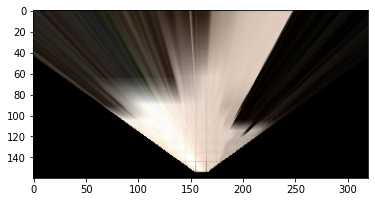

In [8]:
import numpy as np
import cv2


def transformImage(img, src, dst):
    transMatrix = cv2.getPerspectiveTransform(src, dst); '''Perspective Transformation Matrix'''
    warpedImage = cv2.warpPerspective( img, transMatrix, (img.shape[1], img.shape[0]) )
    return warpedImage

dst_size = 5
# Set a bottom offset to account for the fact that the bottom of the image 
# is not the position of the rover but a bit in front of it
bottom_offset = 6

sourcePoints = np.float32([[14, 140], [301 ,140],[200, 96], [118, 96]])
#destinationPoints = np.float32([[13.4819, 140.431], [13, 95], [300, 95.9153], [302.514, 141.077]])

destinationPoints = np.float32([[image.shape[1]/2 - dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - bottom_offset],
                  [image.shape[1]/2 + dst_size, image.shape[0] - 2*dst_size - bottom_offset], 
                  [image.shape[1]/2 - dst_size, image.shape[0] - 2*dst_size - bottom_offset],
                  ])

warpedImage = transformImage(imageGrid, sourcePoints, destinationPoints)
plt.imshow(warpedImage)
plt.show()



In [9]:
def color_thresh(img, rgb_thresh=(160, 160, 160)):
    # Create an array of zeros same xy size as img, but single channel
    color_select = np.zeros_like(img[:,:,0])
    # Require that each pixel be above all thre threshold values in RGB
    # above_thresh will now contain a boolean array with "True"
    # where threshold was met
    above_thresh = (img[:,:,0] > rgb_thresh[0]) \
                & (img[:,:,1] > rgb_thresh[1]) \
                & (img[:,:,2] > rgb_thresh[2])
    # Index the array of zeros with the boolean array and set to 1
    color_select[above_thresh] = 1
    # Return the binary image
    return color_select

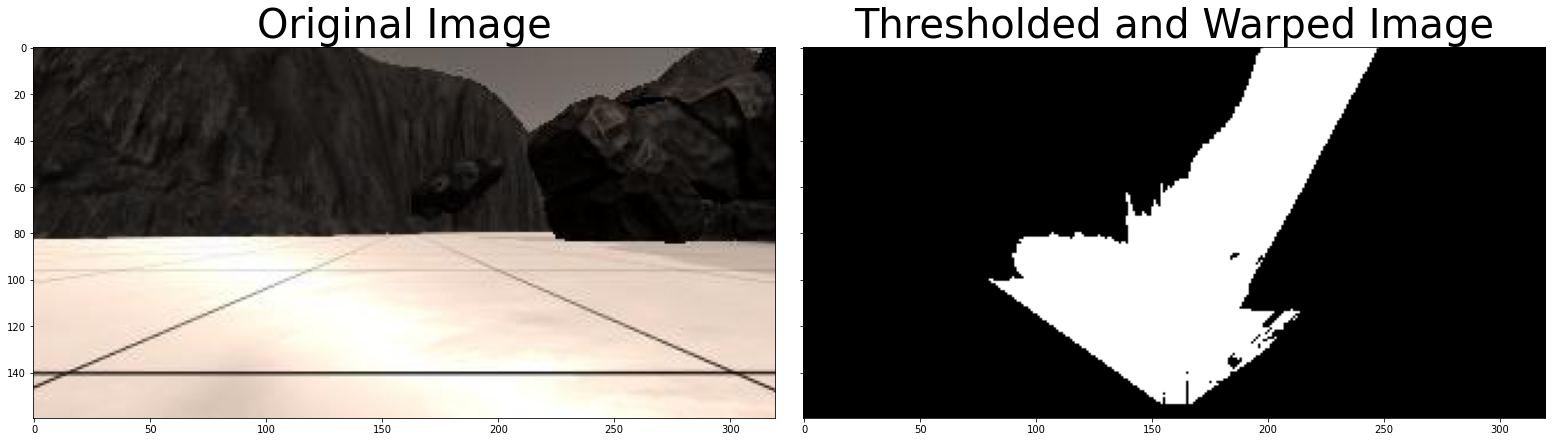

In [10]:
colorsel = color_thresh(warpedImage, rgb_thresh=(160, 160, 160))  

# Display the original image and binary               
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(21, 7), sharey=True)
f.tight_layout()
ax1.imshow(imageGrid)
ax1.set_title('Original Image', fontsize=40)

ax2.imshow(colorsel, cmap='gray')
ax2.set_title('Thresholded and Warped Image', fontsize=40)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show() 



In [11]:
#Mapping to ROver Coordinates

In [12]:
def roverView(image):
    ypos, xpos = image.nonzero()
    x_pixel = xpos - image.shape[1]/2
    y_pixel = image.shape[0] - ypos    
    
    return x_pixel, y_pixel

''' print(xpos, ypos)
    plt.plot(xpos-160, 160-ypos, '+')
    plt.xlim(-160, 160)
    plt.ylim(0, 160)
    plt.show()''' 


" print(xpos, ypos)\n    plt.plot(xpos-160, 160-ypos, '+')\n    plt.xlim(-160, 160)\n    plt.ylim(0, 160)\n    plt.show()"

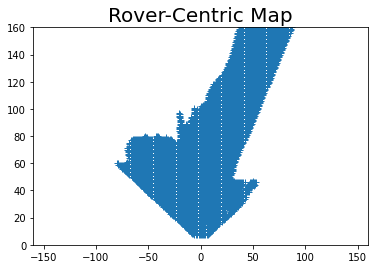

In [17]:
xpix, ypix = roverView(colorsel)
nZeroPixels = (xpix, ypix)
plt.plot(xpix, ypix, '+')
plt.xlim(-160, 160)
plt.ylim(0, 160)
plt.title('Rover-Centric Map', fontsize=20)
plt.show()

# Mapping to World Coordinates

In [14]:
def transformRotation(yawAngle, nZeroPixels):
    yawRadians = np.radians(yawAngle)
    x_rot = nZeroPixels[0] * np.cos(yawRadians) - nZeroPixels[1] * np.sin(yawRadians)
    y_rot = nZeroPixels[0] * np.sin(yawRadians) + nZeroPixels[1] * np.cos(yawRadians)
    return x_rot, y_rot



#print(xpix.shape, ypix.shape)


In [15]:
def transformTranslation(x_rot, y_rot, scale, x_pos, y_pos):
    x_trans = x_pos + x_rot/scale
    y_trans = y_pos + y_rot/scale
    return x_trans, y_trans


In [19]:
def transformWorld(nZeroPixels, scale, xpos, ypos, yawAngle, world_size):
    
    xRot, yRot = transformRotation(yawAngle, nZeroPixels)
    xTrans, yTrans = transformTranslation(xRot, yRot, scale, xpos, ypos)
    
    x_world = np.clip(np.int_(xTrans), 0, world_size - 1)
    y_world = np.clip(np.int_(yTrans), 0, world_size - 1)
    
    return x_world, y_world
    
    
    

In [21]:
yawAngle = np.random.random(1)*360
xpos = np.random.random(1) * 160 + 20
ypos = np.random.random(1) * 160 + 20
world_size = 200
scale = 10

xpix_w, ypix_w = transformWorld(nZeroPixels, scale, xpos, ypos, yawAngle, world_size)
print(xpix_w, ypix_w)

[32 32 32 ... 46 46 46] [52 52 53 ... 46 46 46]


In [54]:
def cvtPolar(nZpixels):
    distance = np.sqrt(nZpixels[0]**2 + nZpixels[1]**2)
    angle = np.arctan2(nZpixels[1], nZpixels[0]) 
    return distance, angle
    

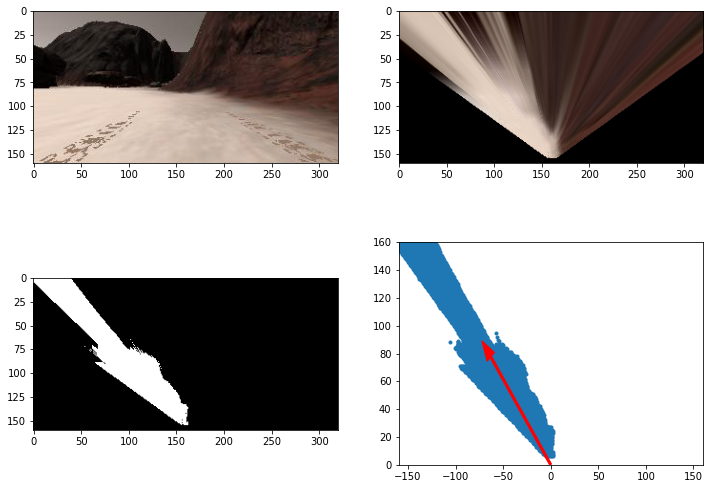

In [56]:
angleImage = mpimg.imread('angle_example.jpg')

warped_w = transformImage(angleImage, sourcePoints, destinationPoints)
colorsel_w = color_thresh(warped_w, rgb_thresh=(160, 160, 160))  
nzpix_w = roverView(colorsel_w)
#transformWorld(nzpix_w, scale, xpos, ypos, yawAngle, world_size)
polarData = cvtPolar(nzpix_w)

avg_angle = np.mean(polarData[1]) # Compute the average angle


# Do some plotting
fig = plt.figure(figsize=(12,9))
plt.subplot(221)
plt.imshow(angleImage)
plt.subplot(222)
plt.imshow(warped_w)
plt.subplot(223)
plt.imshow(colorsel_w, cmap='gray')
plt.subplot(224)
plt.plot(nzpix_w[0], nzpix_w[1], '.')
plt.xlim(-160, 160)
plt.ylim(0, 160)
arrow_length = 100
x_arrow = arrow_length * np.cos(avg_angle)
y_arrow = arrow_length * np.sin(avg_angle)
plt.arrow(0, 0, x_arrow, y_arrow, color='red', zorder=2, head_width=10, width=2)
plt.show()


